In [0]:
from __future__ import absolute_import, division, print_function

from sklearn import svm
import tensorflow as tf
import pathlib
import random
import numpy as np
import os
import math
import matplotlib.pyplot as plt
import pickle
from sklearn.externals import joblib
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from seaborn import heatmap 
tf.enable_eager_execution()

In [0]:
# train
#prepare training arrays

data_root = pathlib.Path('C:/Users/minhu/Desktop/msda/Bus235/dataset')
training_objs = list(data_root.glob('train_data/*.png'))
training_objs = [str(path) for path in training_objs]
random.shuffle(training_objs)

X = []
Y = []

for i in range(len(training_objs)):
    img_raw = tf.read_file(training_objs[i])
    img_tensor = tf.image.decode_image(img_raw, channels=3)
    img_tensor = tf.image.rgb_to_grayscale(img_tensor)
    img_tensor = tf.reshape(img_tensor, [409600])

    a = np.array(img_tensor).tolist()
    X.append(a)
    Y.append(os.path.basename(training_objs[i])[0:8])


In [0]:
#train the model

clf = svm.SVC(kernel='rbf')

In [0]:
clf.fit(X, Y) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [0]:
# Save the model as a pickle in a file 
joblib.dump(clf, 'svm2.pkl') 

['svm2.pkl']

In [0]:
#prepare test array

data_root = pathlib.Path('C:/Users/minhu/Desktop/msda/Bus235/dataset')
testing_objs = list(data_root.glob('test_data/*.png'))
testing_objs = [str(path) for path in testing_objs]
random.shuffle(testing_objs)

A = []
B = []

for i in range(len(testing_objs)):
    img_raw = tf.read_file(testing_objs[i])
    img_tensor = tf.image.decode_image(img_raw, channels=3)
    img_tensor = tf.image.rgb_to_grayscale(img_tensor)
    img_tensor = tf.reshape(img_tensor, [409600])

    a = np.array(img_tensor).tolist()
    A.append(a)
    B.append(os.path.basename(testing_objs[i])[0:8])

In [0]:
#number of test images

len(testing_objs)

409

In [0]:
predictions = clf.predict(A)

In [0]:
print(clf.score(A,B))
                            

0.6723716381418093


In [0]:
def grid(X,Y,inds,n_col,predictions):  #print out randomly selected images and their labels
    N = len(inds)
    n_row = int(1.0*N/n_col)
    fig = plt.figure(figsize=(15, 15))
    for j in range(n_row):
        for k in range(n_col):
            i_inds = (j*n_col)+k
            i_data = inds[i_inds]

            if i_inds < N:
                rgb = np.array(A[i_data])
                label =Y[i_data] 
                img = rgb.reshape(640,640)
                fig.add_subplot(n_row,n_col, i_inds+1)
                pred = predictions[i_data]
                import matplotlib.image as mpimg
                img=mpimg.imread(testing_objs[i_data])
                plt.imshow(img, interpolation='nearest')
                plt.title("actual: {}\n predict: {}".format(label,pred))

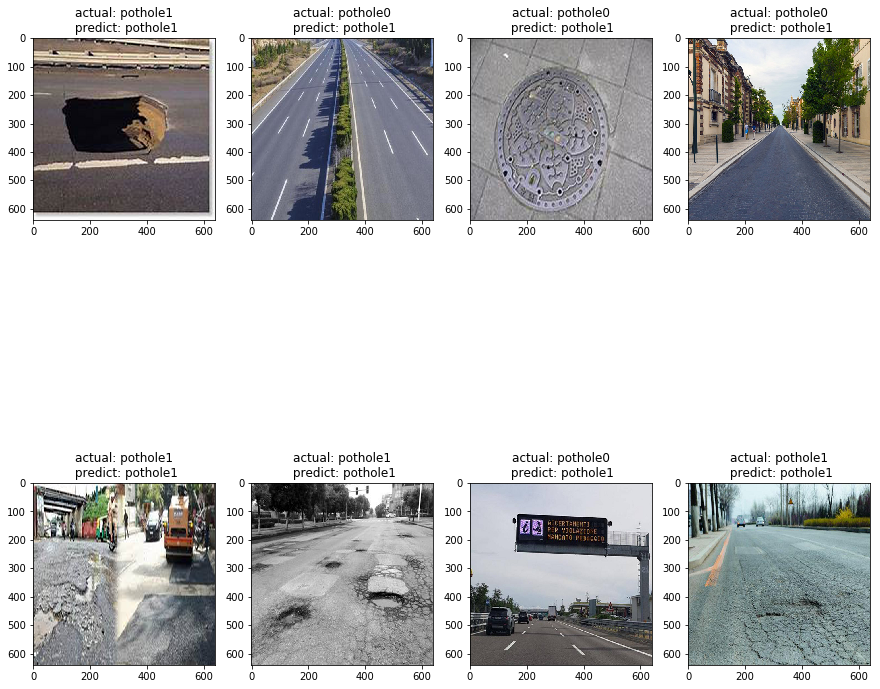

In [0]:
indices = [np.random.choice(range(len(A))) for j in range(8)]
grid(A,B, indices,4,predictions)

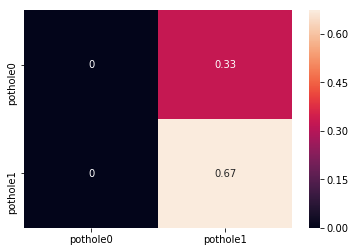

In [0]:
heatmap(mat/len(testing_objs),annot=True,xticklabels=['pothole0','pothole1'],yticklabels=['pothole0','pothole1'])

In [0]:
cr=classification_report(B,predictions)
print(cr)

             precision    recall  f1-score   support

   pothole0       0.00      0.00      0.00       134
   pothole1       0.67      1.00      0.80       275

avg / total       0.45      0.67      0.54       409



C:\Users\minhu\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
